# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [81]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [28]:
#Planteada la hipótesis nula "los números forman una distribución normal", se comprueba con normal.test 
#si la hipótesis se rechaza o no en función del p_value obtenido. Si p<alpha se rechaza la hipótesis y por tanto
#no tiene distribución normal.

sample_size=[10,50,500,5000]
random_samples=[]
alpha=0.05

for e in sample_size:
    random_samples.append(np.random.normal(loc=50, scale=5, size=e))

for i,e in enumerate(random_samples):
    k2,p=stats.normaltest(e)
    if(p < alpha):
        print (f"Sample {i} [k2={k2}, p={p}]: No distribución normal")
    else:
        print (f"Sample {i} [k2={k2}, p={p}]: Distribución normal")

Sample 0 [k2=0.9377726097393764, p=0.6256987180096709]: Distribución normal
Sample 1 [k2=1.4321585056061812, p=0.488664434638171]: Distribución normal
Sample 2 [k2=0.11570022935142774, p=0.9437913973155483]: Distribución normal
Sample 3 [k2=5.7232938134947915, p=0.057174521580234776]: Distribución normal


#### Interpret the normaltest results and make your observations.

In [ ]:
En los ejemplos anteriores, se acepta la hipótesis para todos, ya que p > alpha.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

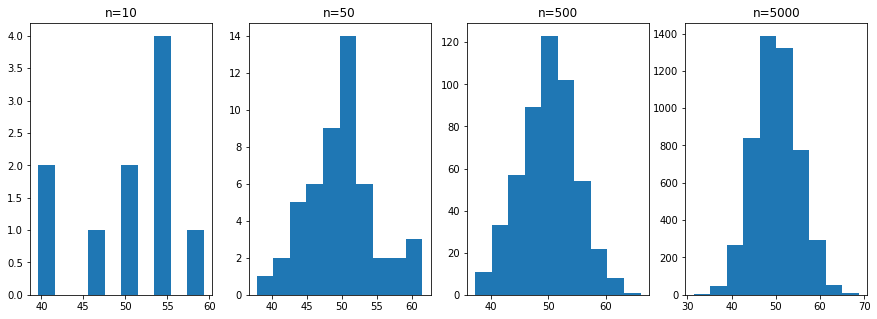

In [49]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,5))

ax1.hist(random_samples[0])
ax1.set_title("n=10")

ax2.hist(random_samples[1])
ax2.set_title("n=50")

ax3.hist(random_samples[2])
ax3.set_title("n=500")

ax4.hist(random_samples[3])
ax4.set_title("n=5000");

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

Según el Teorema del Límite Central, cuando mayor sea la muestra más se aproxima a una distribución normal. En el ejemplo anterior, se puede ver esto. Cuanto mayor es la muestrá más se asemeja a la distribución normal.


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

[4.43705313e-01 3.91504687e-01 1.38178125e-01 2.43843750e-02
 2.15156250e-03 7.59375000e-05]


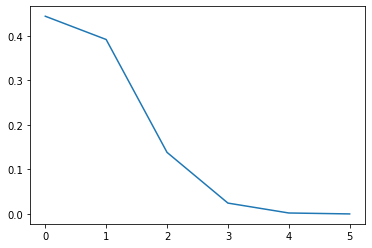

In [66]:
x=range(0,6)
n=5
p=0.15

pmf=binom.pmf(x,n,p)
print(pmf)
plt.plot(binom.pmf(x,n,p));

#### Explain what you observe from the plot above

La probabilidad de que se haga click en un Ad decrece cuando aumenta el número de usuarios. Es decir, es más probable que 1 usuario haga clic (p=3.91504687e-01) que que lo hagan 4 usuarios (p=2.15156250e-03).

#### Now plot PMF with 50, 500, and 5000 visitors.

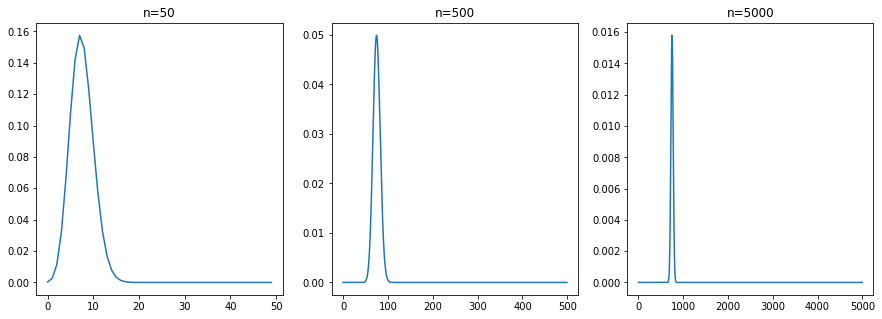

In [80]:
x_50=range(50)
x_500=range (500)
x_5000=range(5000)

fig, (ax1,ax2,ax3) =plt.subplots(1,3,figsize=(15,5))

ax1.plot(binom.pmf(x_50,50,0.15))
ax1.set_title("n=50")

ax2.plot(binom.pmf(x_500,500,0.15))
ax2.set_title("n=500")

ax3.plot(binom.pmf(x_5000,5000,0.15))
ax3.set_title("n=5000");


##### What did you notice from the distribution plots? Comment your findings.

Cuanto mayor es la muestra, menor es la probabilidad de ocurrencia, pero se mantiene el área debajo de la curva igual.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [85]:
mu=300
x=320

poisson.pmf(x, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [88]:
mu2=300
x2=60
poisson.pmf(x2, mu2)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

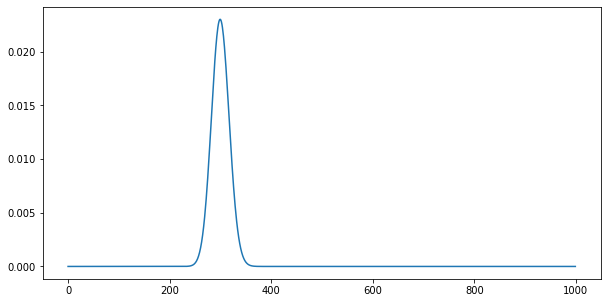

In [93]:
list_poisson= [poisson.pmf(e, 300)for e in range(1000)]

plt.figure(figsize=(10,5))
plt.plot(list_poisson);
